# Machine Learning II

Today, we will cover two of the more common machine learning algorithms, as well as a powerful technique for reducing the dimensionality (the number of predictor variables) of the data prior to applying a machine learning algorithm to the data.

Specifically, this tutorial will cover

- Support Vector Machines
- Using Principal Components Anaysis to simplfy predictor variables
- Gaussian Naive Bayes Classifiers

---

### Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks. It works by finding the optimal decision boundary that best separates the data into different classes. The key concept behind SVM is to maximize the "margin" (distance) between classes, which is defined as the distance between the decision boundary and the nearest data points from each class. These nearest points are called *support vectors*, and they determine the position and orientation of the boundary.

SVM can handle both linearly separable and non-linearly separable data. For linearly separable data, the algorithm finds a straight-line boundary that best separates the classes. However, for non-linearly separable data, SVM uses a technique called the kernel trick. The kernel trick involves transforming the input data into a higher-dimensional space where it becomes linearly separable, allowing the SVM to find the optimal separating boundary.

Here's a step-by-step overview of how SVM works:

Determine the optimal boundary: Find the boundary that best separates the classes by maximizing the margin between them. This is achieved by minimizing a cost function that considers both the margin size and the classification error.

Identify support vectors: Find the data points that lie closest to the decision boundary, as they are critical in defining the optimal boundary.

Make predictions: For a new input data point, determine which side of the decision boundary it lies on.

SVM is known for its effectiveness in high-dimensional spaces and robustness against overfitting, making it suitable for various applications, including image classification, text categorization, and bioinformatics.

First, let's import our needed packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Now well create some toy data to play with.

In [2]:
# Create two 2D blobs of data
X, y = make_blobs(n_samples=300, centers=2, 
                  random_state=42, cluster_std=1.6)

Now let's look at our toy data.

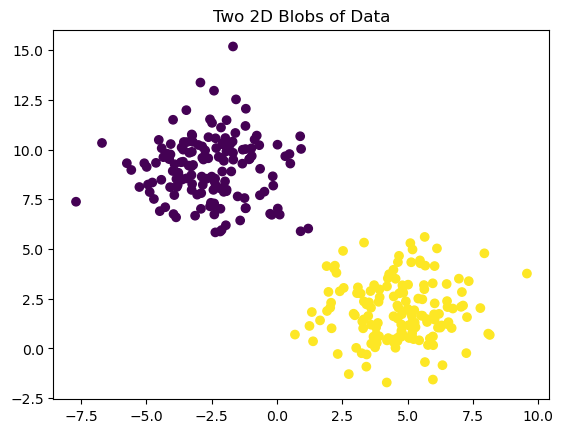

In [3]:
# Plot the blobs of data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Two 2D Blobs of Data")
plt.show()

These two "blobs" of data look like they are clearly separable. So let's make a classifier! The following steps should look familiar. They follow our basic machine learning workflow, which is:

- load the needed things from numpy, matplotlib and, the problem-specific tools from scikit-learn (already done)
- get the data and wrangle it into shape if necessary (already done)
- split the data into training and test sets
- train the machine learning algorithm
- evaluate the performance of the algorithm

---

So now let's split the data into training and test sets. Use the cell below to do this.

In [1]:
from sklearn.model_selection import train_test_split

In [3]:
# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

---

Now we'll create a support vector classifier.

In [4]:
# Create a Support Vector Machine (SVM) classifier and train it on the training data
svm = SVC(kernel='linear', C=1)

---

And now we can train it on out training data. Use the cell below to so this. As always in scikit-learn, we use the `.fit()` method to do this.

In [5]:
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

---

Now let's make a plot of the training data and the decision boundary that the SVM found. Don't worry if you don't understand all the plotting code below; it's a bit next-level. But do look through it and see how much you can figure out, and if you're curious about any of it, just ask!

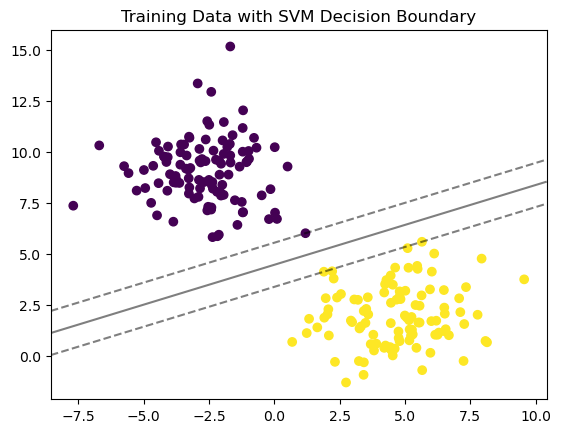

In [6]:
# Scatter plot of the test data showing the decision boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Training Data with SVM Decision Boundary")
plt.show()


Here, we can see the decision boundary (the solid line) and the margins (dashed lines) passing through the support vectors (the closest points from each group to the decision boundary).

Now that we have our decision boundary, we can start using our SVM on new data.

---

Use the cell below to generate the predicted `y_pred` data based upon `X_test`. It's the same as we've done before: use the `.predict()` method of our classifier.

In [7]:
# Make predictions on the test data
y_pred = svm.predict(X_test)

---

The fun part! Let's plot the test data showing the predicted category (by color) and the decision boundary.

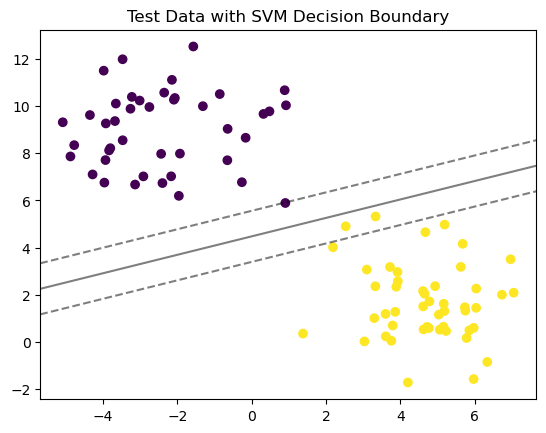

In [8]:
# Scatter plot of the test data showing the decision boundary
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')

# Create the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title("Test Data with SVM Decision Boundary")
plt.show()


Here, we can see that that, even though some of the points fell within the margin, the classification was perfect.

For completeness though, let's look at some standard evaluation metrics for classification.

---

Use the cell below to print the confusion matrix, the classification report, and the accuracy score.

In [9]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

[[42  0]
 [ 0 48]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        48

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

Accuracy Score: 100.00%


---

## Dimension Reduction via PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning, statistics, and data analysis to transform a high-dimensional dataset into a lower-dimensional space while retaining as much information as possible. The primary goal of PCA is to identify and project the data onto the most significant directions (principal components) in the feature space, where the variance of the data is maximized.

Here are the basic steps of PCA:

**Standardization**: The first step is to standardize the dataset by scaling each feature to have a mean of 0 and a standard deviation of 1. This ensures that all features have equal importance in the analysis and prevents larger-scale features from dominating the results. 

Simply put, it makes the data unit-independent by converting all the data to their Z-scores. This means that, for example, a questionaire with scores ranging from 0 to 100 won't be weighted more than a hormone measure that ranges from 0 to 5.

**Covariance Matrix**: PCA computes the covariance matrix of the standardized dataset, which captures the linear relationships between the features. The covariance matrix helps determine the directions in which the variance of the data is maximized.

This a fancy way of saying that we compute the correlation between all the variables. You can think of the covariance matrix as just a numerical version of a pair-pair plot.

**Eigenvalues and Eigenvectors**: The next step is to compute the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent the directions of the principal components, while eigenvalues represent the magnitude of the variance along each principal component. The eigenvector corresponding to the largest eigenvalue represents the direction with the highest variance, and so on.

We can think of the "Eigenvalues" as being proportional to "variance explained" or $R^2$ - if the first two, say, explain most of the variance, then we can safely use the first two principal components to do our categorization.

**Projection onto Principal Components**: Finally, the original dataset is projected onto the principal components (eigenvectors) to obtain the transformed data in the reduced-dimensional space. The number of principal components retained is typically determined by the desired level of variance preservation or the specific problem requirements.

In this step, we just effectively re-plot our data with the first and second principal components are the x and y axes.

PCA has numerous applications, such as data visualization, noise reduction, feature extraction, and improving the efficiency of other machine learning models by reducing the input dimensionality.

### PCA on the Iris data

Let's do a PCA on the iris data! The iris data has 4 predictors, and we're going to use PCA to boil these down into 2 predictors - "principal components" - that we can then use to do a classification of iris species.

First, let's import out libraries so that the cells below are stand-alone.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

---

In the cell below, load the iris dataset

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

---

Now we'll do a PCA on the data to reduce the 4 dimensional data to 2 dimensions.

In [12]:
# Perform PCA on the Iris dataset, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


Look at our new PCA transformed data! Look through the plotting code and make sure you understand what it's doing. Ask about the `zip` function if you don't understand it.

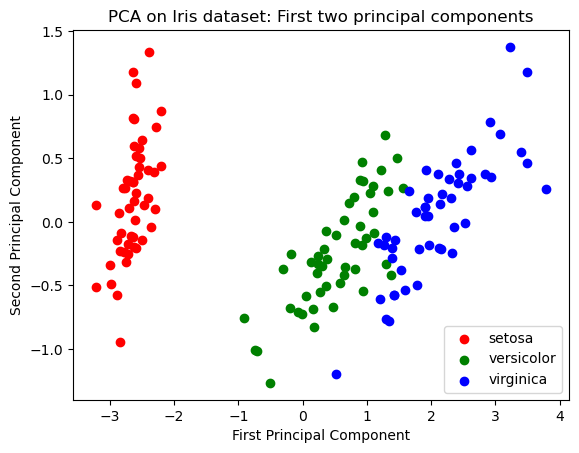

In [14]:
# Scatter plot of the first two principal components 
# with color coding for species
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], 
                color=color, label=target_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("PCA on Iris dataset: First two principal components")
plt.show()

If you refer back to the pair plot of the iris data we did in the previous tutorial, you will see that it looks a bit like a few of the plots, but it doesn't look *exactly* like any of them. That's because each data point's coordinate (its pair of values) is a *weighted combination* of its original values.

Now that we have boiled down the original 4 iris variables into just two values per observation (the 1st and 2nd principal components), let's learn another type of classifier using the new data. (Note that you could also use a k nearest neighbor or any other classifier here – the PCA itself doesn't care what you do after it, and classifiers don't care what you've done the data before you use them).

---

## Gaussian Naive Bayes

A Naive Bayes classifier is a probabilistic machine learning model based on Bayes' theorem, which is used for classification tasks. It's called "naive" because it makes the strong assumption that the features in the dataset are conditionally independent, given the class label. Despite this simplification, Naive Bayes classifiers often perform well in practice and are particularly suited for text classification, spam filtering, and other problems with large feature spaces and relatively simple relationships between features and classes.

Bayes' theorem relates the conditional probabilities of the features and the class labels, and it's formulated as:

$P(y | X) = P(X | y) * P(y) / P(X)$

where:

P(y | X) is the **posterior probability** of the class label y, given the corresponding features in X.

P(X | y) is the **likelihood**, which is the probability of the set of features, X, given the class label y.

P(y) is the **prior probability** of the class label y, which represents the overall frequency of each class in the dataset.

P(X) is the evidence, which is the probability of the entire set of features, X, without regard to any target values, y. In other words, it is an "unconditional probability". *Because it's constant for all classes, it's usually ignored in the classification step.*

To make a prediction, the Naive Bayes classifier calculates the posterior probability for each class as the likelihood times the prior probability (often called just "the prior"). The class with the highest posterior probability is chosen as the predicted class.

A Gaussian Naive Bayes classifier is a variant of the Naive Bayes classifier, specifically designed for continuous-valued features. It is based on Bayes' theorem and assumes that the likelihood of the features, given the class label, follows a Gaussian (normal) distribution. This means that each feature is assumed to be normally distributed within each class. The classifier can thus use the probability density function of the Gaussian distribution to compute the likelihood of a feature value given a class label.

Basically, the classifier looks at the 2 (or more) blobs of data, and generates the Gaussian distribution that best fits the data, and then uses these along with the priors to calculate which distribution was most likely to have generated each data point. *The class with the highest posterior probability is chosen as the predicted class*.

Despite the assumption of independence between features (in other words, that the data blobs represent uncorrelated data), the Gaussian Naive Bayes classifier often performs well in practice and can provide a good baseline for more complex models.

## Classify our PCA-transformed data

First, we'll split our new PCA transformed data in to training and testing sets (as always).

---

In the cell below, re-import the `train_test_split` method from `sklearn.model_selection` just to be sure the code below is stand-alone.

In [15]:
from sklearn.model_selection import train_test_split

Now split the data into training and test sets. *Make sure to use the `X_pca` data, not the original data!* Use a `test_size = 0.3`.

In [16]:
# Split the PCA-transformed data into 
# training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 
                                                    test_size=0.3, 
                                                    random_state=42)


---

Now we'll grab the Gaussian naive Bayes classifier. 

In [17]:
from sklearn.naive_bayes import GaussianNB

Once we create our classifier, it will behave just like all the others we have used.

In [18]:
# Create a Naive Bayes classifier
gnb = GaussianNB()

We have now given birth to a classifier. We can train it using the `fit()` method, and then classify our test data using the `predict()` method, just as we have done before.

---

In the cell below, train our classifier using its `fit()` method using the training data.

In [19]:
# and train it on the PCA-transformed training data
gnb.fit(X_train, y_train)

GaussianNB()

---

Now generate the predicted categories (targets) using the `predict()` method. Make sure and use the held-back `X_test` data!

In [20]:
# Make predictions on the PCA-transformed testing data
y_pred = gnb.predict(X_test)

---

Now we'll make a scatter plot of the data with mistakes as open symbols. Don't worry too much about the specific code, but you might want to keep handy for future plotting.

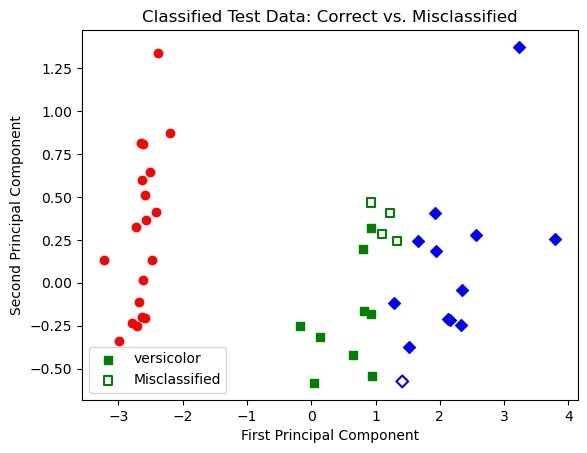

In [24]:
# Scatter plot of the classified test data with mistakes as open symbols
colors = ['red', 'green', 'blue']
species = iris.target_names
markers = ['o', 's', 'D']  # Different marker shapes for each class
labels = ['Correct', 'Misclassified']

# Plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(3), colors, species, markers):
    plt.scatter(X_test[(y_test == y_pred) & (y_test == i), 0], 
                X_test[(y_test == y_pred) & (y_test == i), 1], 
                color=color, marker=marker, 
                label=target_name if i == 1 else None)

# Plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i), 0],
                X_test[(y_test != y_pred) & (y_test == i), 1], 
                color=color, marker=marker, facecolors='none', 
                linewidths=1.5, edgecolors=color, 
                label=labels[1] if i == 1 else None)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc="best")
plt.title("Classified Test Data: Correct vs. Misclassified")
plt.show()

Looks like we did pretty well!

Finally, let's compute the standard diagnostics for our classification.

First, we'll import the methods from `sklearn.metrics`

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

---

Now, in the cell below, compute the accuracy score, classification report, and confusion matrix.

In [23]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.69      0.78        13
           2       0.75      0.92      0.83        13

    accuracy                           0.89        45
   macro avg       0.88      0.87      0.87        45
weighted avg       0.90      0.89      0.89        45

Confusion Matrix:
[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]


---